1. Import Dependencies

In [1]:
import os
import random
import numpy as np
import cv2.cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt

2. Loading Data

In [2]:
DATADIR = 'Arabic Charecaters/Train Images 13440x32x32'
data = []

In [3]:
for file in os.listdir(DATADIR):
    try:
        img = cv.imread(os.path.join(DATADIR, file), 0)
        label = int(file.split('_')[-1].split('.')[0]) - 1
        data.append((img, label))
    except Exception as e:
        print(f'Error{e}:\nin {os.listdir(DATADIR).index(file)}th image!.')

random.shuffle(data)

In [4]:
X, y = [], []

for feature, label in data:
    X.append(feature)
    y.append(label)

3. Normalizing Data

In [5]:
X = np.array(X).reshape(-1, 32, 32, 1)
X = X / 255.0
y = np.array(y)

4. Building Model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), activation='relu', input_shape=X.shape[1:]
    ),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

5. Training Model

In [8]:
history = model.fit(X, y, epochs=6, batch_size=8, validation_split=0.3)

Epoch 1/6
1176/1176 [==============================] - 18s 15ms/step - loss: 1.5104 - accuracy: 0.5345 - val_loss: 0.8256 - val_accuracy: 0.7349
Epoch 2/6
1176/1176 [==============================] - 16s 13ms/step - loss: 0.6375 - accuracy: 0.7924 - val_loss: 0.6803 - val_accuracy: 0.7803
Epoch 3/6
1176/1176 [==============================] - 16s 13ms/step - loss: 0.4181 - accuracy: 0.8618 - val_loss: 0.5819 - val_accuracy: 0.8182
Epoch 4/6
1176/1176 [==============================] - 16s 13ms/step - loss: 0.2969 - accuracy: 0.9033 - val_loss: 0.5151 - val_accuracy: 0.8351
Epoch 5/6
1176/1176 [==============================] - 16s 14ms/step - loss: 0.2117 - accuracy: 0.9267 - val_loss: 0.4583 - val_accuracy: 0.8574
Epoch 6/6
1176/1176 [==============================] - 16s 13ms/step - loss: 0.1687 - accuracy: 0.9397 - val_loss: 0.4804 - val_accuracy: 0.8616


6. Plotting Results

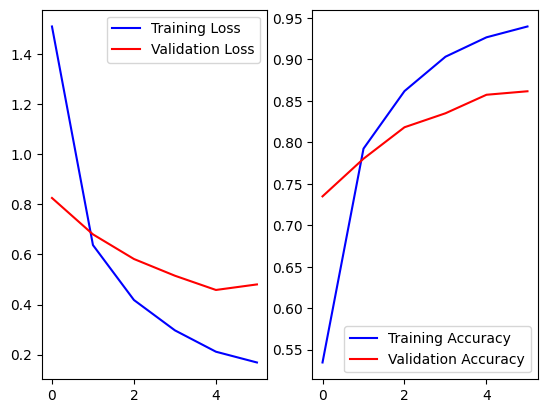

In [9]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b', label='Training Loss')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.legend()
plt.show()

7. Predictions

In [18]:
TESTDIR = 'Arabic Charecaters/Test Images 3360x32x32'
filename = os.listdir(TESTDIR)[100]
print(filename)
img = cv.imread(os.path.join(TESTDIR, filename), 0)
lbl = int(filename.split('_')[-1].split('.')[0]) - 1

img = img.reshape(-1, 32, 32, 1)

p = model.predict([img])

print(f'Prediction: {np.argmax(p) + 1}')
print(f'Label: {lbl + 1}')

id_1901_label_27.png
1/1 [==============================] - 0s 73ms/step
Prediction: 27
Label: 27


7. Saving Model

In [16]:
model.save('ArabicCharacters.h5')